# Machine Learning - wijn

### van: Mart Veldkamp

# Inhoudsopgave

1. Inleiding
2. Het probleem
3. Library's laden + data ophalen
4. Data visualiseren
    - Distributies
    - Features tov. target vector
    - Normaalverdeling
5. Data voorbereiden & opschonen
    - waardes verranderen
    - Normaliseren
    - Data opsplitsen
6. Modellen selecteren
    - Decision tree
    - SVM
7. Modellen trainen en testen
    - Modellen trainen
    - Modellen testen
    - de accuracy, precision, recall en f1
    - Confusion matrix
8. Conclusie
    - Correlatie matrix
- Bronnen

# 1. Inleiding
Deze opdracht is onderdeel van het overkoepelende vak Machine Learning, dit is één van de meerdere datasets die ik gebruik in dit vak, per dataset zijn ten minste 2 verschillende classifiers gebruikt. Deze 6 opdrachten bestaan uit classificatie- en regressieproblemen. En zijn allemaal op een andere manier opgelost.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem

Het probleem dat ik in deze notebook ga behandelen is het bepalen of een wijn wit of rood is. Dit wordt gedaan aan de hand van een best groot stuk features, onder andere de pH waarde van de wijnen. Om te bepalen of wijn wit of rood is zal er gekeken worden naar de dataset om zo een conlusie te halen uit voorgaande data. Dit probleem is een classificatie probleem aangezien er maar 2 mogelijke uitkomsten zijn. Wit of rode wijn. Dus een binaire classificatie.

# 3. Library's laden + data ophalen

Deze dataset is afkomstig van kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import math 
import sklearn

from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from random import sample
%matplotlib inline 

In [2]:
data = pd.read_csv('winequalityN.csv')

print(f'De dataset heeft {data.shape[0]} rijen, en {data.shape[1]} kolommen')
print('\nDit zijn de features/target')
print(data.dtypes)

print('\nHier een kleine sample van de dataset')
data

De dataset heeft 6497 rijen, en 13 kolommen

Dit zijn de features/target
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Hier een kleine sample van de dataset


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


De kolommen worden als volgt geïnterpreteerd:
- type: Het type wijn, wit en rood.
- fixed acidity: Dit is de vaste zuurgraad van wijn, hoe lager de pH, de hoger de zuurgraad.
- volatile acidity: Dit is vluchtige zuurgraad, dit komt minder voor in wijn.
- citric acid: De hoeveelheid citroenzuur in wijn.
- residual sugar: Het hoeveelheid suiker in wijn.
- chlorides: De hoeveelheid chloor in wijn.
- free sulfur dioxide: Het zwevende zwaveldioxide in de wijn.
- total sulfur dioxide: Het totale aantal zwaveldioxide in de wijn.
- density: De dichtheid in de wijn.
- pH: De pH waarde in wijn, dit wordt gebruikt om de wijn sterker of minder sterk te maken.
- sulfates: De hoeveelheid sulfaat in wijn.
- alcohol: De alcohol graag de wijn.
- quality: De qualiteid van de wijn. Dit wordt meestal gemeten door zintuigelijke kenmerken.

# 4. Data visualiseren

In [3]:
data.max()

type                      white
fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                 0.611
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
quality                       9
dtype: object

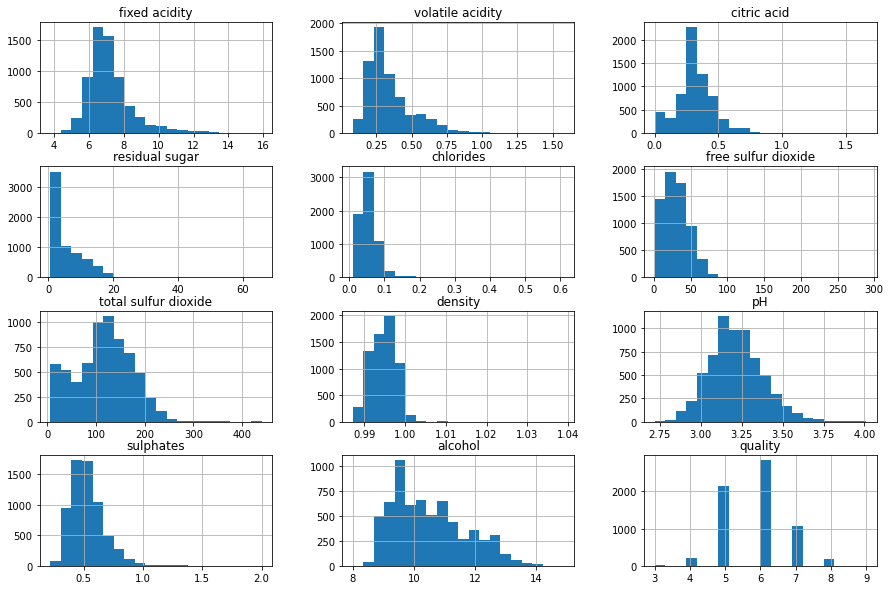

In [4]:
 data.hist(bins = 20, figsize = (15,10));

Het belangrijkste wat je hier kan zien is dat de pH mogelijk een normaal verdeling heeft, met mogelijk een paar outliers. Verder staat er bij het totale aantal sulfur dioxide een totale aantal van 400+. Dit is warscheinlijk een uitschieter en zal mogelijk vervangen moeten worden. Wat ook opvalt is dat er bij de kwaliteit niks hoger is dan 8 of lager dan 3. Dit betekend dat het warscheinlijk erg dicht bij elkaar licht, wat slecht is voor modellen trainen.

Wat ook opvalt is dat hoewel er een redelijke normaal verdeling is bij het pH waarde. Het nog steeds aan de lage kant licht. Aangezien ik nog nooit wijn heb gedronken is dit best schokkend. Aangezien vanaf aan pH waarde van onder de 5.5 er al tandglazuur kan worden aangepast. Wat natuurlijk slecht voor je is.

# 5. Data voorbereiden & opschonen

## waardes verranderen

Om te controleren of elke kolom gevuld is kan het onderstaande gebruikt worden.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Zoals je kan zien zijn er niet echt rare waardes, naast de enige hoge totale sulfur dioxide.

In [6]:
data['total sulfur dioxide'] = data['total sulfur dioxide'].replace(440, data['total sulfur dioxide'].mean())
data = data.fillna(data.mean())

Ik heb hier de hoogte waarde van sulfur dioxide verranderd in het gemiddelde, dit kan niet altijd slim zijn aangezien het gemiddelde misschien net naar een andere wijn verwijst. Maar aangezien ik graag alle data wil houden verwacht ik ook niet dat het een grote invloed zal hebben op de mass data.

## Verrander 'type' naar 0 of 1

In [7]:
data['type'] = data['type'].map({'red': 1, 'white': 0})

data['type']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: int64

## Normaliseren

Bij standaardisering/normalisering wordt de data zo omgevord dat het gemiddelde gelijk is aan 0, en de standaardafwijking gelijk aan1. Dit wordt gedaan door de data om te vormen naar een z-score, zoals eerder behandeld. Dit is ook een soort van normalisatie van de data. Het heeft als voordeel dat er minder 'biases' in de data zitten. Dit passen we allen toe op numerieke data.

In [10]:

data_z = data.copy()
scaler = StandardScaler().fit(data_z[['alcohol', 'sulphates', 'pH','density', 'total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'residual sugar', 'citric acid', 'volatile acidity', 'fixed acidity']])
data_z[['alcohol', 'sulphates', 'pH','density', 'total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'residual sugar', 'citric acid', 'volatile acidity', 'fixed acidity']] = scaler.transform(data_z[['alcohol', 'sulphates', 'pH','density', 'total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'residual sugar', 'citric acid', 'volatile acidity', 'fixed acidity']])

## Data opsplitsen

In [ ]:
x_data = data_z.drop('type', axis=1)
y_data = data_z['type']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

# 6. Modellen selecteren & instellen

Voor deze opdracht zullen 2 moddelen gebruikt worden:

- Decision tree
- SVM (Support Vector Machine)

Uit onderzoek blijkt dat Support vector machine beter zou moeten werken dan Decision tree, daarom is mijn hypothese ook dat Support Vector Machine het beste zou moeten werken ten opzichte van de 2 classifiers.

# 7. Modellen trainen en testen

## Decision tree

### Train en test het model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_pred = dt_model.predict(x_test)

### De accuracu, precision, recall en f1

In [ ]:
print('accuracy: ',metrics.accuracy_score(y_test, dt_pred))
print('Precision: ',metrics.precision_score(y_test, dt_pred, average='micro'))
print('Recall: ',metrics.recall_score(y_test, dt_pred, average='micro'))
print('f1: ',metrics.f1_score(y_test, dt_pred, average='micro'))

accuracy:  0.9853846153846154
Precision:  0.9853846153846154
Recall:  0.9853846153846154
f1:  0.9853846153846154


### Cunfusion matrix

In [ ]:
matrix = metrics.confusion_matrix(y_test, dt_pred)
print(matrix)

print('\nDit wil zeggen dat van de 1300, Logistic regression er 1277 goed heeft')
print('Dit is', 1277/1300*100, '%')

[[978   8]
 [ 11 303]]

Dit wil zeggen dat van de 1300, Logistic regression er 1277 goed heeft
Dit is 98.23076923076923 %


## SVM (Support Vector Machine)

### Train en test het model

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

### De accuracu, precision, recall en f1

In [ ]:
print('accuracy: ',metrics.accuracy_score(y_test, svm_pred))
print('Precision: ',metrics.precision_score(y_test, svm_pred, average='micro'))
print('Recall: ',metrics.recall_score(y_test, svm_pred, average='micro'))
print('f1: ',metrics.f1_score(y_test, svm_pred, average='micro'))

accuracy:  0.9946153846153846
Precision:  0.9946153846153846
Recall:  0.9946153846153846
f1:  0.9946153846153846


### Confusion matrix

In [ ]:
matrix = metrics.confusion_matrix(y_test, svm_pred)
print(matrix)

print('\nDit wil zeggen dat van de 1300, Logistic regression er 1293 goed heeft')
print('Dit is', 1293/1300*100, '%')

[[983   3]
 [  4 310]]

Dit wil zeggen dat van de 1300, Logistic regression er 1293 goed heeft
Dit is 99.46153846153845 %


Dit is de hoogste percentage die ik tot nu toe heb gezien, ik kan niet zeggen dat ik dit niet had verwacht aangezien support vector machine als 1 van de beste modellen wordt gezien voor het leren van dit soort data.

### ROC-curve

# 8. Conclusie

## Correlatie matrix

Bij een correlatiematrix wordt de Pearson's T gebruikt. Dit correlatiecoëfficient zegt iets over twee features; als er een hoge positieve correlatie ism dat dan als het gemiddelde van ene omhoog gaat, dat de andere dan ook omhoog gaat, of juist allebei omlaag. Bij een negatieve correlatie gaat het juist andersom, dit houdt in dat als de ene omhoog gaat, de andere juist omlaag gaat. Bijvoorbeeld bij het wachten op de trein en algeme ervaring; Hoe langer iemand wacht (omhoog), hoe slechter de algemene ervaring (omlaag).

<AxesSubplot:>

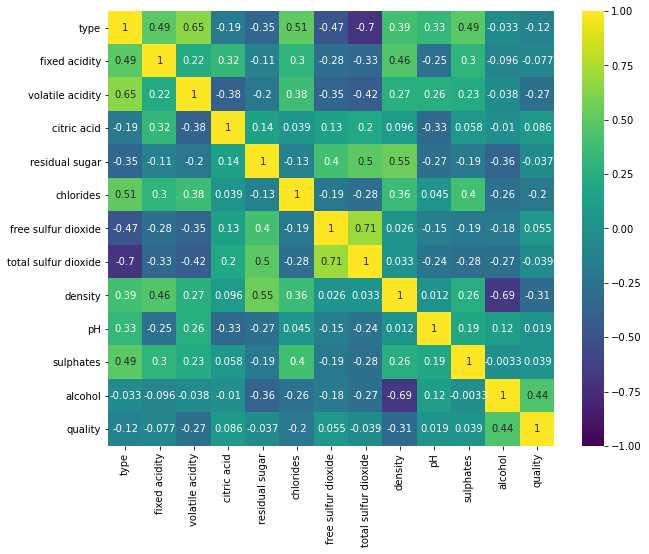

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(data_z.corr(method='pearson'), annot=True, cmap='viridis', vmin=-1, vmax=1)

Zo een correlatie matrix is erg fijn om conclusies uit te trekken ter herkenning dat de dataset klopt. Een goed voorbeeld hiervan is het verband tussen het vrije zwavel in de fles ten opzichte van het totale zwavel. Daarnaast is het zoals eerder vernomen negatieve verband tussen de pH en de citroenzuur ook aanwezig. Omdat wanneer er meer citroenzuur in een fles wijn aanwezig is, de wijn zuurder wordt, wat weer als gevolg heeft dat de pH zal stagneren. Het is erg mooi om deze correlaties tussen de verschillende features te zien aangezien ze allemaal goed te redeneren zijn waarom deze correlatie bestaat.

## Conclusie Decision tree vs SVM (Support Vector Machine)

Mijn conclusie is dat er bij grote datasets beide decision tree als support vector machine erg goed te gebruiken zijn. Maar de support vector machine toch wel beter is zoals verwacht. Het is nog interresant om te zien hoe een Support Vector Machine -model presteert in kleinere datasets.